# Move OOD lrep to in distribution

In [1]:
import warnings
warnings.filterwarnings("ignore") # i hate warnings

from cheff import CheffAEModel, DDIMSampler
import matplotlib.pyplot as plt
import torch
from torchvision.transforms.functional import to_pil_image, to_tensor
import PIL
import numpy as np
from matplotlib.animation import FuncAnimation

In [5]:
device = 'cpu'
sdm_path = 'assets/models/cheff_diff_uncond.pt'
ae_path = 'assets/models/cheff_autoencoder.pt'

cheff_ae = CheffAEModel(model_path=ae_path, device=device)

In [7]:
# generate two latent spaces from images
img_path1 = 'assets/cxrs/sample1.png'
img_path2 = 'assets/cxrs/sample2.png'
img1 = PIL.Image.open(img_path1).convert('RGB')
img2 = PIL.Image.open(img_path2).convert('RGB') 
img1 = to_tensor(img1).unsqueeze(0).to(device)
img2 = to_tensor(img2).unsqueeze(0).to(device)
z1 = cheff_ae.encode(img1)
z2 = cheff_ae.encode(img2)

In [10]:
z_interp = 0.5 * z1 + 0.5 * z2
img_interp = cheff_ae.decode(z_interp)

In [ ]:
# use the DDIM sampler
ddim = DDIMSampler 



### Distance from prior

In [18]:
latent_flattened = z_interp.view(1, -1)  # Shape will be (1, 12288)
distance = torch.norm(latent_flattened, p=2)

z1_flattened = z1.view(1, -1)
z2_flattened = z2.view(1, -1)
distance_z1 = torch.norm(z1_flattened, p=2)
distance_z2 = torch.norm(z2_flattened, p=2)

print(f"Distance between z1 and prior: {distance_z1}")
print(f"Distance between z2 and prior: {distance_z2}")
print(f"Distance between interpolated and prior: {distance}")

Distance between z1 and prior: 2301.479736328125
Distance between z2 and prior: 1955.903076171875
Distance between interpolated and prior: 2272.592041015625


### Re-encode decoded image

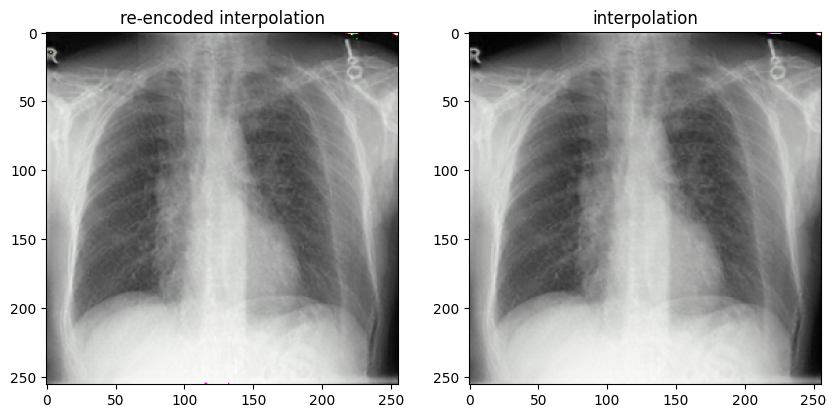

In [12]:
# re-encode decoded image, then decode again
z_interp = cheff_ae.encode(img_interp)
img_interp_again = cheff_ae.decode(z_interp)

# plot img_interp_again and img_interp
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(to_pil_image(img_interp_again[0].cpu()))
plt.title('re-encoded interpolation')
plt.subplot(1, 2, 2)
plt.imshow(to_pil_image(img_interp[0].cpu()))
plt.title('interpolation')
plt.show()